In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


In [ ]:
# Handling Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [ ]:
df.dropna(inplace=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [ ]:
# Step 1: Define Target Column
target_column = 'Genre'



Genre
Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: count, dtype: int64


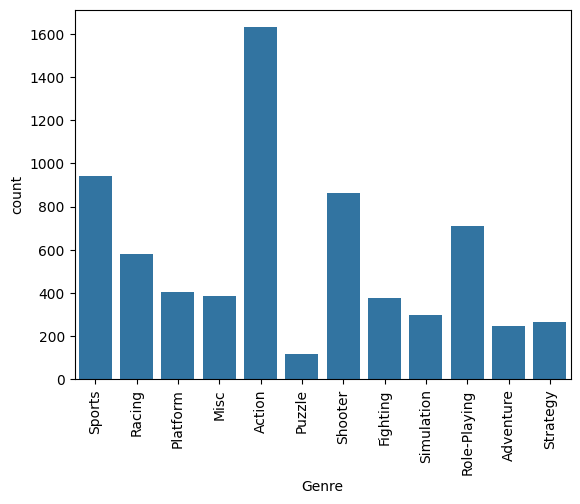

In [ ]:
target_column = 'Genre'

if target_column in df.columns:
    print(df[target_column].value_counts())
    sns.countplot(x=target_column, data=df)
    plt.xticks(rotation=90)
    plt.show()
else:
    print(f"Column '{target_column}' not found.")

In [ ]:
# Replace 'tbd' with NaN
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
# Convert to float
df['User_Score'] = pd.to_numeric(df['User_Score'])

In [ ]:
df = df.dropna(subset=['User_Score'])

In [ ]:
print(df['User_Score'])

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
        ... 
16667    2.4
16677    8.8
16696    7.6
16700    5.8
16706    7.2
Name: User_Score, Length: 6825, dtype: float64


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print (categorical_cols)

Index(['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], dtype='object')


In [ ]:
label_encoders = {}

categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
print(df.head())
print(df.info())

Index(['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], dtype='object')
   Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
0  4215        12           2006.0     10        160     41.36     28.96   
2  2087        12           2008.0      6        160     15.68     12.76   
3  4217        12           2009.0     10        160     15.61     10.93   
6  2567         2           2006.0      4        160     11.28      9.14   
7  4213        12           2006.0      3        160     13.96      9.18   

   JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0      3.77         8.45         82.53          76.0          51.0   
2      3.79         3.29         35.52          82.0          73.0   
3      3.28         2.95         32.77          80.0          73.0   
6      6.50         2.88         29.80          89.0          65.0   
7      2.93         2.84         28.92          58.0          41.0   

   User_Score  User_Count  Develo

In [ ]:
#Detecting and Removing Outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


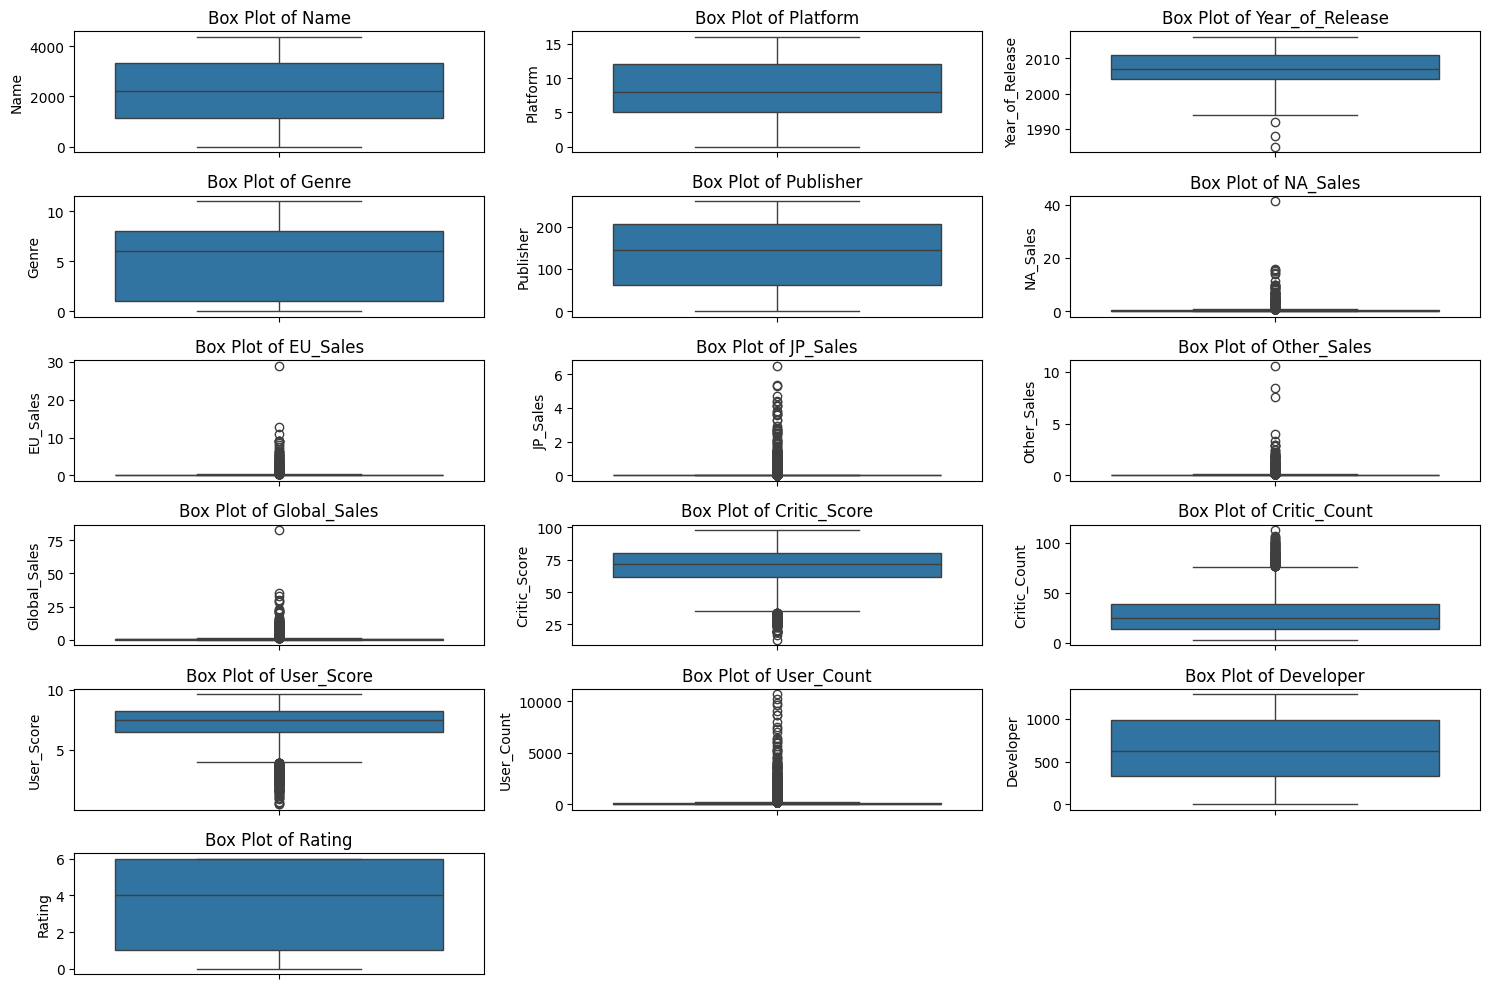

In [ ]:
# Box Plots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df_zscore = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]
print(df_zscore)

       Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
144    2189         7           2001.0      0        123      2.45      2.01   
146    2188         6           1998.0      0        123      3.18      1.83   
156     624         2           2006.0      9          4      3.07      1.91   
159     191         8           2009.0      0        237      2.54      1.93   
160     188        14           2007.0      1        237      3.28      1.64   
...     ...       ...              ...    ...        ...       ...       ...   
16656  1229        13           2016.0      0        160      0.00      0.01   
16677  2297         3           2002.0      2        146      0.01      0.00   
16696  2194         5           2014.0      0        123      0.00      0.01   
16700   407         5           2011.0      8         53      0.01      0.00   
16706  3094         5           2011.0     11        240      0.00      0.01   

       JP_Sales  Other_Sales  Global_Sa

In [ ]:
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])
df_minmax

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0.963208,0.7500,0.677419,0.909091,0.613027,1.000000,1.000000,0.580000,0.799432,1.000000,0.741176,0.436364,0.824176,0.029828,0.598602,0.166667
2,0.476920,0.7500,0.741935,0.545455,0.613027,0.379110,0.440608,0.583077,0.311258,0.430320,0.811765,0.636364,0.857143,0.066129,0.598602,0.166667
3,0.963665,0.7500,0.774194,0.909091,0.613027,0.377418,0.377417,0.504615,0.279092,0.396995,0.788235,0.636364,0.824176,0.017634,0.598602,0.166667
6,0.586609,0.1250,0.677419,0.363636,0.613027,0.272727,0.315608,1.000000,0.272469,0.361003,0.894118,0.563636,0.879121,0.040053,0.598602,0.166667
7,0.962751,0.7500,0.677419,0.272727,0.613027,0.337524,0.316989,0.450769,0.268685,0.350339,0.529412,0.345455,0.670330,0.011725,0.598602,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0.239488,0.1875,0.516129,0.000000,0.605364,0.000242,0.000000,0.000000,0.000000,0.000000,0.388235,0.009091,0.208791,0.001595,0.319099,0.166667
16677,0.524909,0.1875,0.548387,0.181818,0.559387,0.000242,0.000000,0.000000,0.000000,0.000000,0.800000,0.081818,0.912088,0.000469,0.201863,0.666667
16696,0.501371,0.3125,0.935484,0.000000,0.471264,0.000000,0.000345,0.000000,0.000000,0.000000,0.788235,0.154545,0.780220,0.038270,0.479037,0.666667
16700,0.093007,0.3125,0.838710,0.727273,0.203065,0.000242,0.000000,0.000000,0.000000,0.000000,0.564706,0.081818,0.582418,0.003658,0.076863,1.000000


In [ ]:
# One-liner preprocessing
df_clean = df.replace('tbd', np.nan).assign(User_Score=lambda x: pd.to_numeric(x['User_Score'])).dropna(subset=['User_Score'])
df_clean = df_clean[(np.abs(zscore(df_clean.select_dtypes(include=['int64', 'float64']))) < 3).all(axis=1)]
# Print the cleaned DataFrame
print("Preprocessed Dataset:")
print(df_clean.head())

Preprocessed Dataset:
     Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
144  2189         7           2001.0      0        123      2.45      2.01   
146  2188         6           1998.0      0        123      3.18      1.83   
156   624         2           2006.0      9          4      3.07      1.91   
159   191         8           2009.0      0        237      2.54      1.93   
160   188        14           2007.0      1        237      3.28      1.64   

     JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
144      0.87         0.72          6.05          96.0          42.0   
146      0.78         0.24          6.03          94.0          20.0   
156      0.07         0.57          5.63          67.0          35.0   
159      0.21         0.86          5.55          91.0          70.0   
160      0.07         0.56          5.54          81.0          77.0   

     User_Score  User_Count  Developer  Rating  
144         8.7      1026.0

In [ ]:
print("Shape after preprocessing:", df_clean.shape)

Shape after preprocessing: (6399, 16)


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score





In [ ]:
# Select numeric features for clustering
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].dropna()

In [ ]:
# 1. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

In [ ]:
# Cluster validation
print("K-Means Silhouette Score:", silhouette_score(X, kmeans_labels))
print("Agglomerative Silhouette Score:", silhouette_score(X, agglo_labels))


K-Means Silhouette Score: 0.4162245002711447
Agglomerative Silhouette Score: 0.3902749660862409


In [ ]:
# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Find optimal k using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

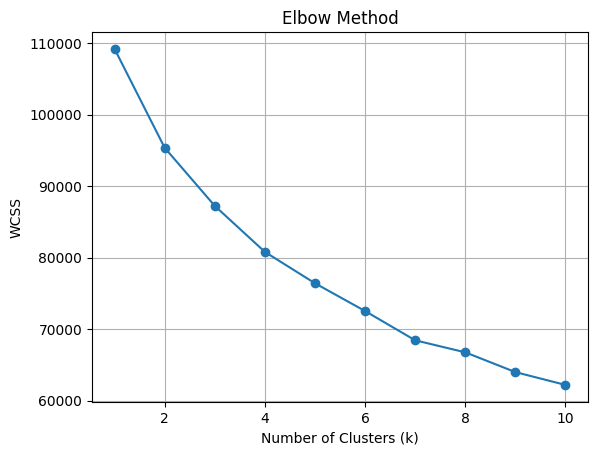

In [ ]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Step 6: Check Silhouette Scores
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.596
Silhouette Score for k=3: 0.093
Silhouette Score for k=4: 0.095
Silhouette Score for k=5: 0.098
Silhouette Score for k=6: 0.093
Silhouette Score for k=7: 0.095
Silhouette Score for k=8: 0.088
Silhouette Score for k=9: 0.091
Silhouette Score for k=10: 0.093


In [ ]:
# Step 7: Apply KMeans with optimal k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# prompt: # Step 8: Add cluster labels to the original DataFrame
# df['Cluster'] = kmeans.labels_   Length of values (6894) does not match length of index (7590)

# Step 8: Add cluster labels to the original DataFrame
# Ensure that the index of the labels matches the index of the original DataFrame subset used for clustering
df.loc[X.index, 'Cluster'] = kmeans.labels_


In [ ]:
# Step 8: Add cluster labels to the original DataFrame
# Ensure that the index of the labels matches the index of the original DataFrame subset used for clustering
df.loc[X.index, 'Cluster'] = kmeans.labels_

In [ ]:
print("\nCluster Labels:", kmeans.labels_)
print("Centroids (scaled):\n", kmeans.cluster_centers_)
print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")


Cluster Labels: [2 2 2 ... 0 1 1]
Centroids (scaled):
 [[ 0.07720363  0.00839444 -0.13315167  0.18305446  0.05956093  0.06327107
   0.04260964  0.02135657  0.03093174  0.05345543  0.59181591  0.37364789
   0.51513057  0.0953666   0.0545773   0.05877455]
 [-0.09154903 -0.01168394  0.16395461 -0.24109255 -0.07930849 -0.24192251
  -0.22538578 -0.16835851 -0.19492858 -0.24951723 -0.80810538 -0.53891914
  -0.67703741 -0.21813474 -0.07434404 -0.07114493]
 [-0.28887569  0.02418781  0.30337867  0.08726694  0.05615097  5.12773473
   5.46102512  4.51759841  4.97084722  5.78270544  1.20309272  1.6825677
   0.20002276  3.01970035  0.10517982 -0.17333323]]
Inertia (WCSS): 87236.53


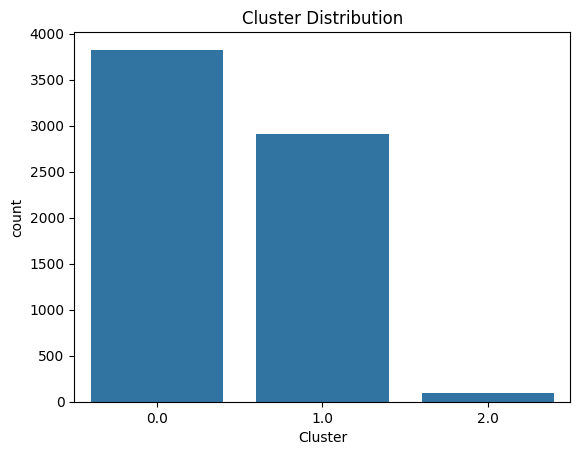

In [ ]:
# Step 10:View cluster distribution
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Select numeric features
X = df.select_dtypes(include=['int64', 'float64']).dropna()

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

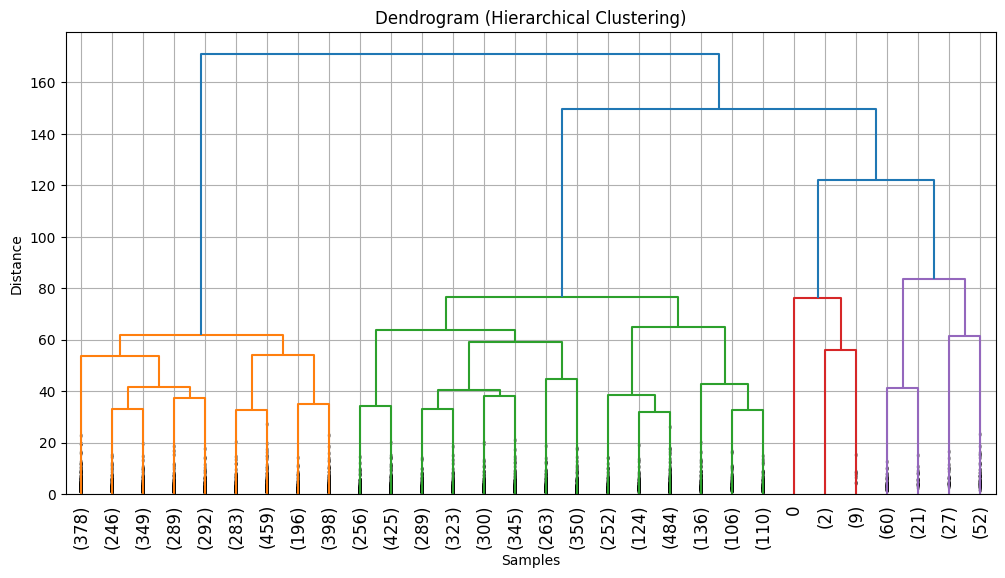

In [ ]:
# Plot dendrogram to decide number of clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [ ]:
#Apply Agglomerative Clustering
n_clusters = 3  # Choose based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)





In [ ]:
# Add cluster labels to original DataFrame
# Ensure that the index of the labels matches the index of the original DataFrame subset used for clustering
df.loc[X.index, 'Cluster_HC'] = labels

In [ ]:
#cluster distribution
print(df['Cluster_HC'].value_counts())

Cluster_HC
2.0    3763
1.0    2890
0.0     172
Name: count, dtype: int64


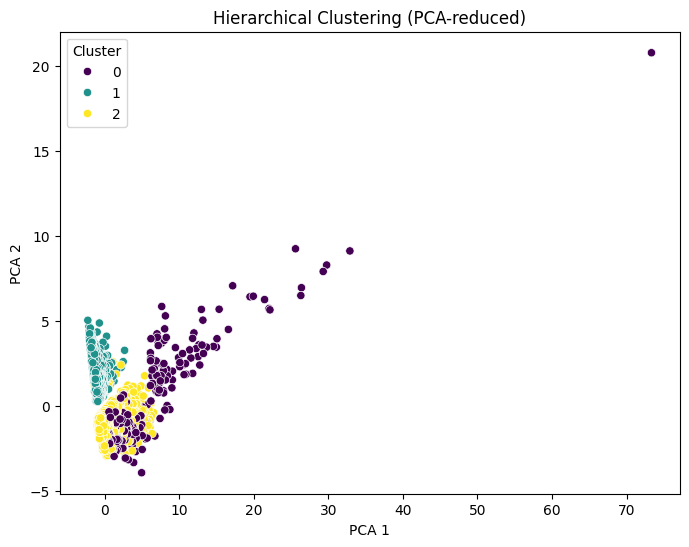

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title('Hierarchical Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Step 1: Drop the target column from X
X = df.drop('Genre', axis=1)  # Keep only the features
y = df['Genre']               # This is the target variable

In [ ]:
# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Apply RFE
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [ ]:
# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)


Selected features: Index(['Platform', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'Rating'], dtype='object')


In [ ]:
from collections import Counter

print(Counter(y))


Counter({0: 1630, 10: 943, 8: 864, 7: 712, 6: 581, 4: 403, 3: 384, 2: 378, 9: 297, 11: 267, 1: 248, 5: 118})


In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("Class distribution after ROS:", Counter(y_train_ros))

Class distribution after ROS: Counter({0: 1304, 2: 1304, 8: 1304, 4: 1304, 7: 1304, 9: 1304, 3: 1304, 1: 1304, 6: 1304, 10: 1304, 5: 1304, 11: 1304})


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({0: 1304, 2: 1304, 8: 1304, 4: 1304, 7: 1304, 9: 1304, 3: 1304, 1: 1304, 6: 1304, 10: 1304, 5: 1304, 11: 1304})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [ ]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.3289
Decision Tree Accuracy: 0.4864
Random Forest Accuracy: 0.5766
Gradient Boosting Accuracy: 0.5868


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:10:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6593


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Split with stratification to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')  # Removed use_label_encoder param
}

# Train and evaluate
for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.3531
Decision Tree Accuracy: 0.4872
Random Forest Accuracy: 0.5634
Gradient Boosting Accuracy: 0.6000
XGBoost Accuracy: 0.6615


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Accuracy: 0.3289
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.70      0.43       328
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        69
           3       0.00      0.00      0.00        71
           4       0.26      0.14      0.18        76
           5       0.00      0.00      0.00        25
           6       0.10      0.02      0.03       119
           7       0.23      0.23      0.23       142
           8       0.50      0.14      0.22       180
           9       0.20      0.02      0.03        54
          10       0.42      0.73      0.54       200
          11       0.00      0.00      0.00        54

    accuracy                           0.33      1365
   macro avg       0.17      0.17      0.14      1365
weighted avg       0.26      0.33      0.25      1365



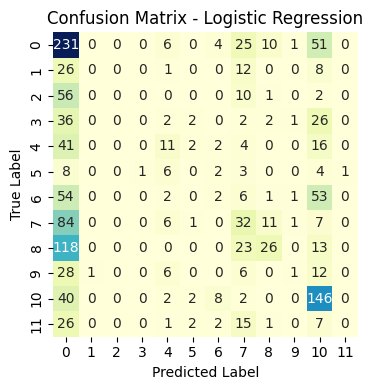


--- Decision Tree ---
Accuracy: 0.4894
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.59      0.56       328
           1       0.15      0.13      0.14        47
           2       0.60      0.52      0.56        69
           3       0.36      0.38      0.37        71
           4       0.41      0.43      0.42        76
           5       0.12      0.16      0.14        25
           6       0.46      0.35      0.40       119
           7       0.41      0.38      0.39       142
           8       0.52      0.53      0.53       180
           9       0.28      0.26      0.27        54
          10       0.74      0.71      0.73       200
          11       0.35      0.33      0.34        54

    accuracy                           0.49      1365
   macro avg       0.41      0.40      0.40      1365
weighted avg       0.49      0.49      0.49      1365



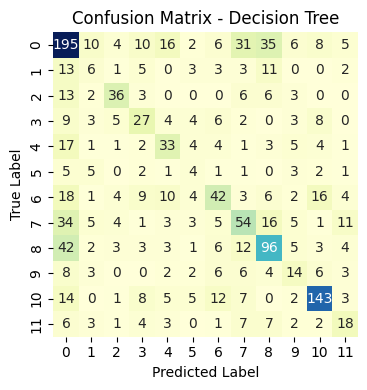


--- Random Forest ---
Accuracy: 0.5744
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60       328
           1       0.57      0.09      0.15        47
           2       0.71      0.39      0.50        69
           3       0.67      0.39      0.50        71
           4       0.52      0.42      0.47        76
           5       0.86      0.24      0.38        25
           6       0.59      0.41      0.49       119
           7       0.53      0.51      0.52       142
           8       0.60      0.68      0.64       180
           9       0.65      0.20      0.31        54
          10       0.67      0.86      0.76       200
          11       0.61      0.26      0.36        54

    accuracy                           0.57      1365
   macro avg       0.62      0.43      0.47      1365
weighted avg       0.59      0.57      0.55      1365



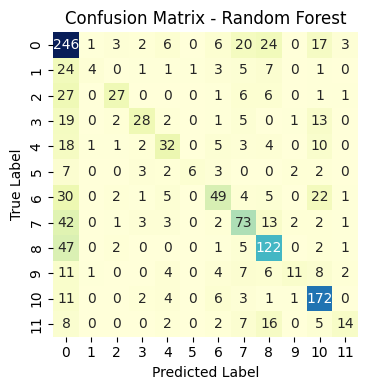


--- Gradient Boosting ---
Accuracy: 0.5868
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.75      0.61       328
           1       0.37      0.15      0.21        47
           2       0.80      0.58      0.67        69
           3       0.53      0.35      0.42        71
           4       0.43      0.39      0.41        76
           5       0.38      0.20      0.26        25
           6       0.72      0.50      0.59       119
           7       0.54      0.55      0.54       142
           8       0.63      0.57      0.60       180
           9       0.64      0.26      0.37        54
          10       0.71      0.85      0.78       200
          11       0.59      0.41      0.48        54

    accuracy                           0.59      1365
   macro avg       0.57      0.46      0.50      1365
weighted avg       0.59      0.59      0.57      1365



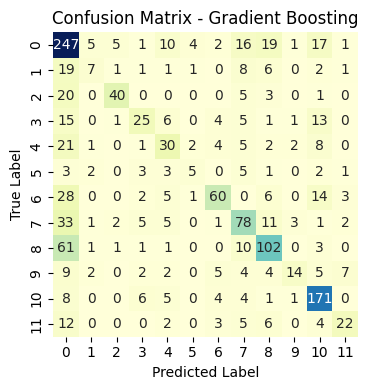

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
Accuracy: 0.6593
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       328
           1       0.53      0.19      0.28        47
           2       0.80      0.62      0.70        69
           3       0.64      0.48      0.55        71
           4       0.52      0.55      0.54        76
           5       0.67      0.24      0.35        25
           6       0.73      0.56      0.64       119
           7       0.64      0.65      0.65       142
           8       0.66      0.72      0.69       180
           9       0.67      0.41      0.51        54
          10       0.77      0.85      0.81       200
          11       0.61      0.41      0.49        54

    accuracy                           0.66      1365
   macro avg       0.65      0.54      0.57      1365
weighted avg       0.66      0.66      0.65      1365



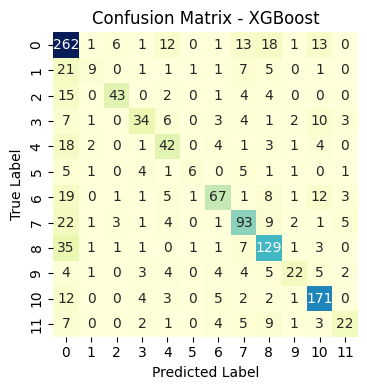

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you already have models defined in a dictionary like this:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Split your dataset (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, square=True,
                xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


In [98]:
print(X_train.columns)
print(X_train.columns.tolist())


Index(['Platform', 'Year_of_Release', 'Publisher', 'Critic_Score',
       'User_Score', 'Rating', 'Developer'],
      dtype='object')
['Platform', 'Year_of_Release', 'Publisher', 'Critic_Score', 'User_Score', 'Rating', 'Developer']


In [ ]:
!pip install pyngrok

In [92]:
!pip install flask-ngrok
!pip install flask
!pip install imbalanced-learn
!pip install xgboost


In [95]:
!pip install flask pyngrok


In [93]:
!ngrok config add-authtoken 2xYZF9UE3YezFSf5tD3ljuLUEPZ_MWhHUxK2tDiKQFsa3UX9


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [105]:
import joblib
# Assuming 'models' dictionary is defined and contains the trained models
# Let's save the XGBoost model as it's commonly used and was evaluated.
# You can choose to save any of the trained models.
if "XGBoost" in models:
    xgb_model = models["XGBoost"]
    joblib.dump(xgb_model, 'video_game_sales_model.joblib')
    print("XGBoost model saved as 'video_game_sales_model.joblib'")
else:
    print("XGBoost model not found in the models dictionary.")

XGBoost model saved as 'video_game_sales_model.joblib'


In [108]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <link rel="shortcut icon" href="{{ url_for('static', filename='favicon.ico') }}" type="image/x-icon" />
    <title>Video Game Genre Predictor</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            padding: 20px;
            background-color: #f5f5f5;
        }
        .container {
            max-width: 800px;
            margin: 0 auto;
            padding: 30px;
            background-color: white;
            border-radius: 10px;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.1);
        }
        h1 {
            color: #2c3e50;
            text-align: center;
            margin-bottom: 30px;
        }
        .form-group {
            margin-bottom: 20px;
        }
        label {
            display: block;
            margin-bottom: 8px;
            font-weight: bold;
            color: #34495e;
        }
        input, select, button {
            width: 100%;
            padding: 12px;
            border: 1px solid #ddd;
            border-radius: 5px;
            font-size: 16px;
            box-sizing: border-box;
        }
        button {
            background-color: #3498db;
            color: white;
            border: none;
            cursor: pointer;
            font-weight: bold;
            margin-top: 20px;
            transition: background-color 0.3s;
        }
        button:hover {
            background-color: #2980b9;
        }
        #result {
            margin-top: 30px;
            padding: 20px;
            background-color: #f8f9fa;
            border-radius: 5px;
            display: none;
        }
        #result h2 {
            color: #2c3e50;
            margin-top: 0;
        }
        #predicted_genre {
            font-size: 18px;
            font-weight: bold;
            color: #27ae60;
        }
        .print-btn {
            background-color: #2ecc71;
            margin-top: 20px;
        }
        .print-btn:hover {
            background-color: #27ae60;
        }
        .form-row {
            display: flex;
            gap: 20px;
        }
        .form-row .form-group {
            flex: 1;
        }
        @media print {
            button {
                display: none;
            }
            .container {
                box-shadow: none;
            }
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Video Game Genre Predictor</h1>
        <form id="predictForm" onsubmit="event.preventDefault(); predictGenre();">
            <div class="form-row">
                <div class="form-group">
                    <label for="platform">Platform:</label>
                    <select id="platform" name="platform" required>
                        <option value="">Select Platform</option>
                        <option value="Wii">Wii</option>
                        <option value="NES">NES</option>
                        <option value="GB">Game Boy</option>
                        <option value="DS">DS</option>
                        <option value="X360">Xbox 360</option>
                        <option value="PS3">PlayStation 3</option>
                        <option value="PS4">PlayStation 4</option>
                        <option value="3DS">3DS</option>
                        <option value="N64">Nintendo 64</option>
                        <option value="PS2">PlayStation 2</option>
                        <option value="SNES">SNES</option>
                        <option value="GBA">GBA</option>
                        <option value="PSP">PSP</option>
                        <option value="PC">PC</option>
                        <option value="XB">Xbox</option>
                        <option value="GC">GameCube</option>
                        <option value="WiiU">Wii U</option>
                        <option value="PS">PlayStation</option>
                        <option value="XOne">Xbox One</option>
                    </select>
                </div>
                <div class="form-group">
                    <label for="year">Year of Release:</label>
                    <input type="number" id="year" name="year" min="1980" max="2016" required />
                </div>
            </div>

            <div class="form-group">
                <label for="publisher">Publisher:</label>
                <input type="text" id="publisher" name="publisher" required />
            </div>

            <div class="form-row">
                <div class="form-group">
                    <label for="critic_score">Critic Score (0-100):</label>
                    <input type="number" id="critic_score" name="critic_score" min="0" max="100" />
                </div>
                <div class="form-group">
                    <label for="user_score">User Score (0-10):</label>
                    <input type="number" id="user_score" name="user_score" min="0" max="10" step="0.1" />
                </div>
            </div>

            <div class="form-row">
                <div class="form-group">
                    <label for="rating">Rating:</label>
                    <select id="rating" name="rating">
                        <option value="">Select Rating</option>
                        <option value="E">Everyone</option>
                        <option value="E10+">Everyone 10+</option>
                        <option value="T">Teen</option>
                        <option value="M">Mature</option>
                        <option value="AO">Adults Only</option>
                        <option value="RP">Rating Pending</option>
                    </select>
                </div>
                <div class="form-group">
                    <label for="developer">Developer:</label>
                    <input type="text" id="developer" name="developer" />
                </div>
            </div>

            <button type="submit">Predict Genre</button>
        </form>

        <div id="result">
            <h2>Prediction Result</h2>
            <p>Predicted Genre: <span id="predicted_genre"></span></p>
        </div>

        <button class="print-btn" onclick="window.print()">Print Prediction</button>
    </div>

    <script>
        async function predictGenre() {
            const form = document.getElementById('predictForm');
            const formData = new FormData(form);

            // Remove empty fields before sending
            const jsonData = {};
            formData.forEach((value, key) => {
                if (value !== '') {
                    jsonData[key] = value;
                }
            });

            console.log("Sending data:", jsonData);

            try {
                const response = await fetch('/predict', {
                    method: 'POST',
                    headers: { 'Content-Type': 'application/json' },
                    body: JSON.stringify(jsonData)
                });

                const result = await response.json();

                if (result.error) {
                    document.getElementById('predicted_genre').innerText = result.error;
                } else {
                    document.getElementById('predicted_genre').innerText = result.genre;
                }

                document.getElementById('result').style.display = 'block';
            } catch (error) {
                document.getElementById('predicted_genre').innerText = 'Error: ' + error.message;
                document.getElementById('result').style.display = 'block';
            }
        }
    </script>
</body>
</html>

In [ ]:
import os
from flask import Flask, request, jsonify, render_template
from pyngrok import ngrok
import joblib
import pandas as pd

# Ensure templates directory exists
if not os.path.exists('templates'):
    os.makedirs('templates')

# Load your trained model
genre_model = joblib.load('video_game_sales_model.joblib')

app = Flask(__name__)

# Ngrok setup (replace with your actual auth token)
ngrok.set_auth_token("2xYZF9UE3YezFSf5tD3ljuLUEPZ_MWhHUxK2tDiKQFsa3UX9")
port = 5001
public_url = ngrok.connect(port)
print(f"Ngrok Tunnel URL: {public_url}")

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json() if request.is_json else request.form

        # Prepare input data dictionary with type conversions and None for empty optional fields
        input_data = {
            'Platform': data.get('platform'),
            'Year_of_Release': int(data.get('year')),
            'Publisher': data.get('publisher'),
            'Critic_Score': float(data.get('critic_score')) if data.get('critic_score') else None,
            'User_Score': float(data.get('user_score')) if data.get('user_score') else None,
            'Rating': data.get('rating'),
            'Developer': data.get('developer')
        }

        features_df = pd.DataFrame([input_data])

        # If your model requires preprocessing (encoding, scaling), do it here before prediction
        # For example:
        # features_df = preprocess_features(features_df)

        predicted_genre = genre_model.predict(features_df)[0]

        return jsonify({'genre': predicted_genre})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(port=port)


Ngrok Tunnel URL: NgrokTunnel: "https://4e6e-34-46-155-13.ngrok-free.app" -> "http://localhost:5001"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [25/May/2025 16:20:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/May/2025 16:20:17] "GET /static/favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [25/May/2025 16:20:31] "POST /predict HTTP/1.1" 200 -
